# Coding 3: Data Management and Analysis with Python  

## Final Project

## By Abigail Chen(2103124) & Nawal Zehra Hasan(2101481)

## 31st March 2022

## Executive Summary

This project intends to apply the learnings of the course using different packages and techniques to clean, understand, visualize and analyze our data. For this purpose we chose a dataset on world university ranking available on kaggle. We used two tables; Times World Ranking and Education Expenditure and narrowed our analysis to the year 2011. We chose this particular year as we had corresponding data for the ye available in the expenditure table. We used an API to extract Research and Development Expenditure on Education for different years to enrich our data. Using these 3 tables we answered the following questions:

* Which are the top 5 countries based on the R&D expenditure?
* What is the relationship between the top 20 universities total score and number of students?
* Which universities are more gender inclusive?
* How is education expenditure divided among different types of institutions?
* What is the distribution of education expenditure between private and public institutes?
* How did different features contribute to the top 10 university's ranking in 2011?

Please find the link to the github repository: [final_project](https://github.com/nawalhasan/World-University-Ranking-)

## About the Dataset

The dataset we chose was about World University Rankings and it had 6 tables. The dataset can be found [here](https://www.kaggle.com/datasets/mylesoneill/world-university-rankings). However, we picked 2 that seemed more relevant to our study. Times higher education ranking is widely regarded as one of the most influential ratings providers for universities globally. It uses multiple parameters to analyze a university’s performance, which are part of the times data table as well, such as students to staff ratio, percentage of international students, and male to female ratio. The Times University Ranking included different criterion according to which universities accross the world are ranked. It included data from 2011 to 2016. We chose the year 2011 to work with. We had a total of 14 variables and 2603 observations. We used some variables for calculations for example calculating the percentage of international students. 

The Education Expenditure table included government spending on education in different years by different institution types including public, private and total. For this table we had 333 variables and 9 observations. Most of these observations were years so they were dropped deeming them irrelevant. The Education Expenditure table contains a list of countries along with their spending on education as a percentage of GDP. This is further bifurcated based on level of education (higher education and elementary education) and type of spending (total, public, private).
 

Import Libraries

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import requests
import json
import os
import seaborn as sns
import wbgapi as wb
import matplotlib.pyplot as plt
%matplotlib inline

Change Working Directory

In [2]:
os.getcwd()

'/Users/nawalhasan/Desktop/python_project'

In [3]:
os.chdir(r"/Users/nawalhasan/Desktop/python_project/")

In [4]:
# check available styles for plots
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
# set style for plots
plt.style.use("seaborn-colorblind")

## Exploratory Data Analysis

We started with reading and transforming our data wherever required. We checked the rows and columsn for both tables fater improting the csv's. The times table had some missing values and a '-' for missing values. We removed that and renamed some columns for easy interpretation. We dropped some years in the expenditure table rendering them insignificant for our analysis. We also checked the data types and converted columns to floats that were originally objetcts such as income scores and number of students. We checked for duplicates and found none. For the missing values in the 2011 column in expenditure table we imputed it with the mean as it was an important variable and we did not want to drop above 50 observations. We also used the number of international students column to calculate the percentage of international students. This calculation will be used later. We also checked the count of years seeing how many observations belonged to each year.

Import the Data

In [6]:
# importing data
times = pd.read_csv("times_data.csv")

In [7]:
# check number of rows and columns
times.shape

(2603, 14)

In [8]:
# importing the file without the engine gave an error
expenditure = pd.read_csv("edu_expenditure.csv", engine="python")

In [9]:
# check number of rows and columns
expenditure.shape

(333, 9)

In [10]:
# checking the times file
times.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011


In [11]:
# checking the expenditure file
expenditure.head(3)

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5


Rename Columns

In [12]:
# rename variables to make them more informative
times.rename(columns={"teaching": "teaching_score", "international": "international_score", "research": "research_score", "citations": 'citations_score', 'income': 'income_score'}, inplace=True)

Check Count of Years

In [13]:
# observations in each year
times["year"].value_counts()

2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

Drop Unused Columns

In [14]:
# drop all years except 2011
expenditure = expenditure.drop(["1995", "2000","2005","2009","2010"], axis = 1)

Check Data Types

In [15]:
# checking data types for times table
times.dtypes

world_rank                 object
university_name            object
country                    object
teaching_score            float64
international_score        object
research_score            float64
citations_score           float64
income_score               object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [16]:
# convert strings to integers
def convert_int(df, col):
    return df[col].apply(pd.to_numeric)

In [17]:
# no null column
null_col = times.columns[times.isnull().any()].tolist()
times = times.fillna(0)
print(f"NaN column found = {times.isnull().any().any()}")

NaN column found = False


In [18]:
# remove dashes from columns with missing values
def remove_dash(df, col):
    df.loc[df[col].str.contains("-"), col] = 0
    df[col] = convert_int(df, col)
    return df

dash_cols = ["international_score", "income_score", "total_score"]
for col in dash_cols:
    times = remove_dash(times, col)

In [19]:
# remove commas from num_students
times.num_students = times.num_students.map(lambda x: x.replace(",", "") if type(x) != int and "," in x else 0).apply(pd.to_numeric)

In [20]:
times.dtypes

world_rank                 object
university_name            object
country                    object
teaching_score            float64
international_score       float64
research_score            float64
citations_score           float64
income_score              float64
total_score               float64
num_students                int64
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [21]:
# checking data types for expenditure table
expenditure.dtypes

country                     object
institute_type              object
direct_expenditure_type     object
2011                       float64
dtype: object

All data types were not correct. We changed some object variables data types from strings to floats in the times table. 

Check for Duplicates and Missing Values

In [22]:
# check duplicates in times
times.duplicated().sum()

0

In [23]:
# check duplicates in expenditure
expenditure.duplicated().sum()

0

No duplicates found

Check Missing Values

In [24]:
# missing values in expenditure table
expenditure.isnull().sum()

country                     0
institute_type              0
direct_expenditure_type     0
2011                       51
dtype: int64

In [25]:
# mean of 2011's expenditure
mean_value=expenditure['2011'].mean()

In [26]:
# impute with mean and check updated data frame
expenditure["2011"].fillna(value=mean_value, inplace=True)
print("Updated Dataframe:")
print(expenditure)

Updated Dataframe:
                  country                  institute_type  \
0            OECD Average               All Institutions    
1               Australia               All Institutions    
2                 Austria               All Institutions    
3                 Belgium               All Institutions    
4                  Canada               All Institutions    
..                    ...                             ...   
328                Turkey  Higher Education Institutions    
329        United Kingdom  Higher Education Institutions    
330         United States  Higher Education Institutions    
331                Brazil  Higher Education Institutions    
332    Russian Federation  Higher Education Institutions    

    direct_expenditure_type     2011  
0                    Public  5.30000  
1                    Public  4.30000  
2                    Public  5.50000  
3                    Public  6.40000  
4                    Public  2.57305  
..            

After finding 51 missing observations for 2011 we decided to impute this with the mean of 2011 expenditure by government on education. We took this decision as 2011 is the only year we are considering as we have data only for this particular year in our times ranking table. Imputing was essential 50 is a substantial number of observations and we did not want to drop them. We observed the distribution of citation score,teaching score and research score which are generally not seen as a common factor to measure a university's ranking. However, our data visualizations otherwise. 

Calculating the Percentage of International Students

In [27]:
# percentage of international students
times["international_students_percent"] = times.international_students.map(lambda x: x.replace("%", "") if type(x) != int and "%" in x else 0).apply(pd.to_numeric)
times["num_international_students"] = (times.num_students * times.international_students_percent) / 100

## Data Exploration

After spending some time to clean our data which is an important prerequisite to get more accurate insights we used our data and did some visualizations to see what exactly does our data include and how is it useful to us. We found all the countries that had the top universities by times ranking. Then we did a description of our data which showed the summary statistics including mean, meadian and quartiles for all numeric variables in our data. We also created a correlation matrix to see how different variables were correlated to one another if at all. Then we narrowed our years to 2011 only and saw which universities ranked in the top 10 in 2011 by their world rank and total score. We also saw that top 10 universities were in UK and USA. Using the international students percentage we found out that USA has the top 5 universities with the highest percentage of international students. We saw how education expenditure was distributed in the year 2011. We took 5 different scores and put them on one line chart to see where and how they intersect, which of those is the most important and what is the trend like according to the top ten ranked universities.

Countries with Top Ranked Universities

In [28]:
# Countries with top universities 
countries = times["country"].unique()
type(countries) , countries

(numpy.ndarray,
 array(['United States of America', 'United Kingdom', 'Switzerland',
        'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
        'Australia', 'China', 'France', 'Sweden', 'Germany',
        'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
        'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
        'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
        'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
        'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Chile',
        'Estonia', 'Saudi Arabia', 'Mexico', 'Colombia', 'Macau',
        'Morocco', 'Luxembourg', 'Unisted States of America', 'Cyprus',
        'Unted Kingdom', 'Uganda', 'Malaysia', 'Lebanon', 'Romania',
        'Slovenia', 'Pakistan', 'Hungary', 'United Arab Emirates',
        'Belarus', 'Serbia', 'Slovakia', 'Bangladesh', 'Ghana', 'Nigeria',
        'Indonesia', 'Jordan', 'Latvia', 'Kenya', 'Argentina', 'Qatar',
        'Oman'

In [29]:
print ("\nThe top 100 universities distribution by country")

g = times[["country", "year", "university_name"]][times["world_rank"].str.len() < 3 ]
g.groupby(["year", "country"])["university_name"].count()


The top 100 universities distribution by country


year  country                 
2011  Australia                    5
      Canada                       4
      China                        3
      France                       2
      Germany                      3
                                  ..
2016  South Korea                  1
      Sweden                       3
      Switzerland                  2
      United Kingdom              16
      United States of America    39
Name: university_name, Length: 94, dtype: int64

Summary Statistics of Data

In [30]:
# summary statistics of numeric variables
to_drop = set(times.columns) - {"f_num_students", "f_student_staff_ratio", "f_international_students", "num_students", "female_male_ratio"}
times[list(to_drop)].describe()

,international_students_percent,research_score,num_international_students,citations_score,total_score,year,income_score,student_staff_ratio,international_score,teaching_score
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,15.046485,35.910257,3268.096466,60.921629,27.612447,2014.075682,44.877833,18.027199,51.827622,37.801498
std,10.736581,21.254805,2693.255481,23.073219,31.080443,1.685733,24.396057,11.656084,22.275823,17.604218
min,0.000000,2.900000,0.000000,1.200000,0.000000,2011.000000,0.000000,0.000000,0.000000,9.900000
25%,7.000000,19.600000,1289.590000,45.500000,0.000000,2013.000000,31.400000,11.650000,33.200000,24.700000
50%,13.000000,30.500000,2678.200000,62.500000,0.000000,2014.000000,39.500000,15.900000,50.200000,33.900000
75%,21.000000,47.250000,4639.830000,79.050000,54.800000,2016.000000,56.000000,21.200000,69.000000,46.400000
max,82.000000,99.400000,18317.520000,100.000000,96.100000,2016.000000,100.000000,162.600000,100.000000,99.700000


We can see from the summary table that the information we have available is from the year 2011 to 2016. We have picked 2011 as one year for our analysis as most. We have a total of 2603 observations after dropping observations and imputing missing values with the mean. Secondly, there are universities that received quite high teaching, research and citations score as revealed by the maximum and even quite low scores as citation with 45% shown my the minimum.   

Text(0.5, 1.0, 'citations_score')

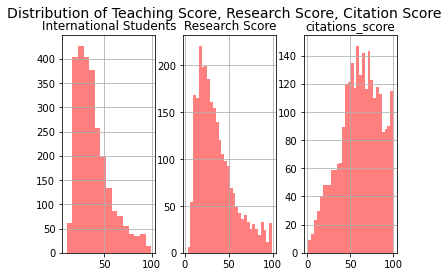

In [31]:
# check histograms for teaching_score, research_score, citations_score
# summary statistics
fig, axes = plt.subplots(1, 3)
fig.suptitle("Distribution of Teaching Score, Research Score, Citation Score", fontsize=14)
colors = ["red"]

times.hist("teaching_score", bins=15, alpha=0.5, ax=axes[0],align="mid", color=colors)
axes[0].set_title('International Students')

times.hist("research_score", bins=30, alpha=0.5, ax=axes[1], align="mid", color=colors)
axes[1].set_title("Research Score")

times.hist("citations_score", bins=30, alpha=0.5, ax=axes[2], align="mid", color=colors)
axes[2].set_title("citations_score")


The histograms give a good insight into the distribution of different scores and internation students presen in our data.  We can see that citation score is more or less normally distributed with some observations at the higher end. The research score has a longer right tail showing more observations fell in the lower end of the spectrum. We can also observe the total score. One would assume that with high citation or international students score the total score would be on the higher end but that stands incorrect as the total score has a long right tail with few universities at the higher end.

In [32]:
# check correlation for numeric variables
to_drop = set(times.columns) - {"year", "f_num_students", "f_student_staff_ratio", "f_international_students"}
times[list(to_drop)].corr()

,international_students_percent,num_students,research_score,num_international_students,citations_score,total_score,income_score,student_staff_ratio,international_score,teaching_score
international_students_percent,1.000000,-0.126728,0.334674,0.650681,0.309218,0.394746,0.064428,-0.026489,0.785753,0.273349
num_students,-0.126728,1.000000,0.065739,0.441384,-0.071692,0.014292,-0.034938,0.373440,-0.140809,0.043537
research_score,0.334674,0.065739,1.000000,0.387543,0.525264,0.842224,0.256890,-0.182574,0.240735,0.913120
num_international_students,0.650681,0.441384,0.387543,1.000000,0.226854,0.377579,0.018943,0.166236,0.533317,0.320044
citations_score,0.309218,-0.071692,0.525264,0.226854,1.000000,0.686424,-0.004042,-0.129201,0.318686,0.503867
total_score,0.394746,0.014292,0.842224,0.377579,0.686424,1.000000,0.138965,-0.217326,0.310083,0.815933
income_score,0.064428,-0.034938,0.256890,0.018943,-0.004042,0.138965,1.000000,0.026740,0.080574,0.179760
student_staff_ratio,-0.026489,0.373440,-0.182574,0.166236,-0.129201,-0.217326,0.026740,1.000000,0.057293,-0.270348
international_score,0.785753,-0.140809,0.240735,0.533317,0.318686,0.310083,0.080574,0.057293,1.000000,0.130530
teaching_score,0.273349,0.043537,0.913120,0.320044,0.503867,0.815933,0.179760,-0.270348,0.130530,1.000000


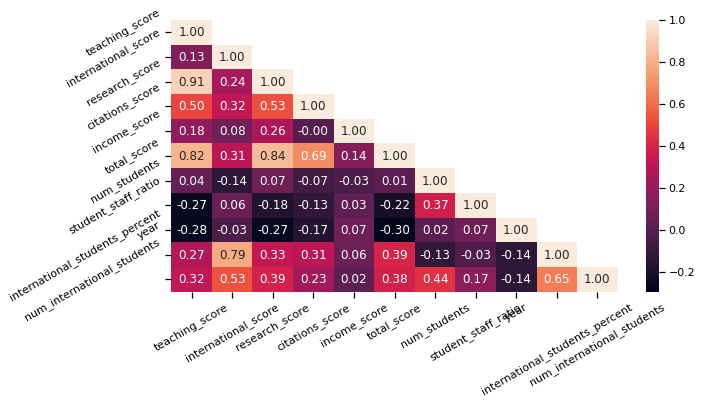

In [33]:
# Correlation with heat map
corr = times.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,5))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt=".2f")
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=30)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

We can see from the correlation matrix and the heat map under that, that total score and international students per year tend to have a negative correlation at -0.3. This can mean that it is an insignificant measure of a university's world rank. This is important as it shows that it is not just one factor contributing to a university's success rather a multitude of factors that add value and must be considered.

The Average Student to Staff Ratio

In [34]:
print("The avg student_staff_ratio is:")
times['student_staff_ratio'].mean()


The avg student_staff_ratio is:


18.02719938532468

Analysis for 2011

In [35]:
# year 2011
year = 2011
times = times[times.year == year]
times.head(10)

,world_rank,university_name,country,teaching_score,international_score,research_score,citations_score,income_score,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,international_students_percent,num_international_students
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25%,0,2011,25,5038.00
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,27%,33 : 67,2011,27,605.61
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,33%,37 : 63,2011,33,3654.42
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,22%,42:58:00,2011,22,3431.12
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,94.2,7929,8.4,27%,45:55:00,2011,27,2140.83
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,34%,46:54:00,2011,34,6396.08
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,34%,46:54:00,2011,34,6772.46
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,0.0,91.1,36186,16.4,15%,50:50:00,2011,15,5427.90
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060,11.7,51%,37 : 63,2011,51,7680.60
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,0.0,89.5,11751,4.4,20%,50:50:00,2011,20,2350.20


Top Ten Universities By Score, Rank and Country

In [36]:
# top ten universities by total score, country and world rank
times[["world_rank", "university_name", "country", "total_score", "year"]][:20]

,world_rank,university_name,country,total_score,year
0,1,Harvard University,United States of America,96.1,2011
1,2,California Institute of Technology,United States of America,96.0,2011
2,3,Massachusetts Institute of Technology,United States of America,95.6,2011
3,4,Stanford University,United States of America,94.3,2011
4,5,Princeton University,United States of America,94.2,2011
5,6,University of Cambridge,United Kingdom,91.2,2011
6,6,University of Oxford,United Kingdom,91.2,2011
7,8,"University of California, Berkeley",United States of America,91.1,2011
8,9,Imperial College London,United Kingdom,90.6,2011
9,10,Yale University,United States of America,89.5,2011


We checked the top ten universities by world rank and score for 2011. We can see that most universities in the list belong to USA followed by the UK. Let us see a visual of that below.

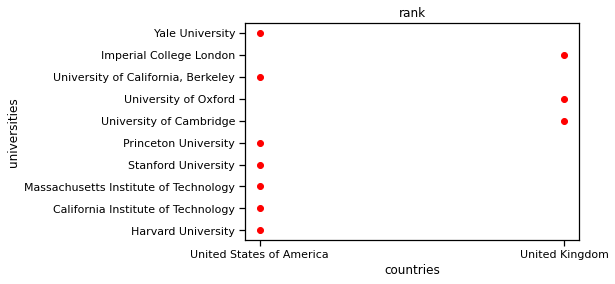

<Figure size 720x360 with 0 Axes>

In [37]:
#Top ten universities with respect to world rank
times = times.head(10)
plt.scatter(times.country,times.university_name, color="red")
plt.xlabel("countries")
plt.ylabel("universities")
plt.title("rank")
plt.figure(figsize=(10,5))
plt.show()

Top Five Universities with Highest Percentage of International Students

In [38]:
times[times.country == 'United States of America'].sort_values('international_students_percent', ascending=False)[["world_rank", "university_name", "country", "year", "international_students_percent"]].head(5)

,world_rank,university_name,country,year,international_students_percent
2,3,Massachusetts Institute of Technology,United States of America,2011,33
1,2,California Institute of Technology,United States of America,2011,27
4,5,Princeton University,United States of America,2011,27
0,1,Harvard University,United States of America,2011,25
3,4,Stanford University,United States of America,2011,22


We had calculated the percentage of international students above and used it here to get the top five universities with highest percentage of international students. This is a key factor to determine a university's reach and intake patterns.

Best Universities in the United States of America

In [39]:
country = "United States of America"
country_data = times[times["country"] == country]
country_data[["world_rank", "university_name", "country", "total_score", "year"]][:50]

,world_rank,university_name,country,total_score,year
0,1,Harvard University,United States of America,96.1,2011
1,2,California Institute of Technology,United States of America,96.0,2011
2,3,Massachusetts Institute of Technology,United States of America,95.6,2011
3,4,Stanford University,United States of America,94.3,2011
4,5,Princeton University,United States of America,94.2,2011
7,8,"University of California, Berkeley",United States of America,91.1,2011
9,10,Yale University,United States of America,89.5,2011


Since our top universities are in USA, we wanted to see the top ten universities in USA along with their total score for the year 2011. 

Top 5 universities in 2011

<Figure size 720x360 with 0 Axes>

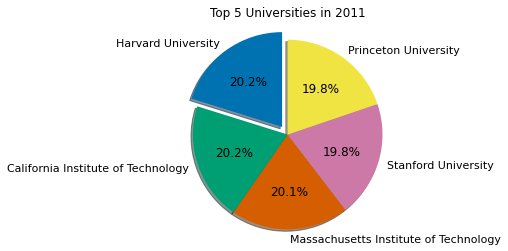

In [40]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Harvard University","California Institute of Technology","Massachusetts Institute of Technology","Stanford University", "Princeton University"
sizes = [96.1,96,95.6,94.3,94.2] # university score
explode = (0.1, 0, 0, 0,0)  
plt.figure(figsize=(10,5))
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%",
        shadow=True, startangle=90)
ax1.axis("equal")  
plt.title("Top 5 Universities in 2011")
plt.show()

World Rank by Teaching Score

Text(0.5, 1.0, 'World Rank by Teaching Score')

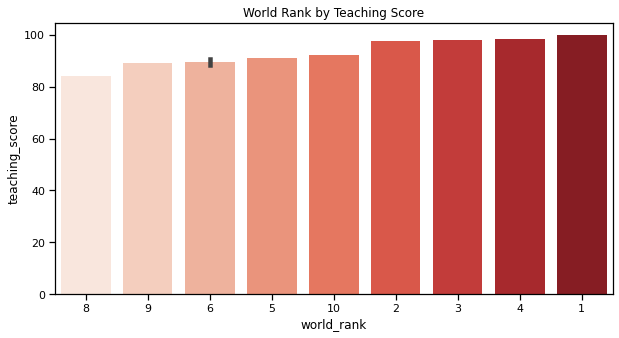

In [41]:
order = times.groupby(["world_rank"])["teaching_score"].mean().sort_values().index
plt.figure(figsize=(10,5))
sns.barplot(x=times["world_rank"].head(10), y=times["teaching_score"], palette="Reds", order=order)
plt.title("World Rank by Teaching Score")

We can see that top ten universities by teaching score have varying levels of scores after rank 5. The 9 and 10 ranked universities have a higher teaching score compared to the university ranked 8th. This means that teaching score alone is not a good measurement of a university's rank.

Distribution of Education Expenditure in 2011

/Users/nawalhasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


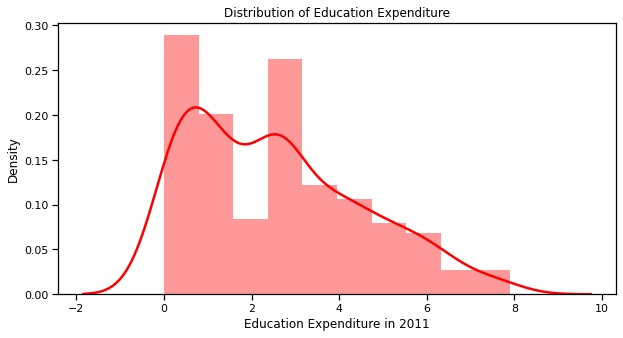

In [42]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(expenditure["2011"], color="red")

plt.title("Distribution of Education Expenditure")
plt.xlabel("Education Expenditure in 2011")
plt.show()

In the above plot we can see that in 2011 many countries spent lesso n education i.e. 1% or less and few spend higher. In our data there were no countries that spend more than 8% on education in 2011. This is the spending on all education institutions.

## World Bank API 

The API data was retrieved using documetation available  at [help desk](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures) and [world bank documentation](https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS?view=chart). We used the Wolrd Bank API using the data reader package. We set the parameters and chose all countries and then the data as 2011 only. We then performed some data cleaning on the retrieved data. We renamed the columns, changed the format so it can used as a table and saved as a csv file. Next, we checked for missing values. There were quite a few missing values and we decided to impute them with the mean rather than dropping a substantial number of observations. As an analyst these are decisions one has to take according to their experience and doman knowledge. This might not necessarily be considered the best approach in many cases.
        

In [43]:
# an interesting package that enabled direct access to data
from pandas_datareader import wb

In [44]:
# setting the parameters
RnD = "GB.XPD.RSDV.GD.ZS"
countries = "all"

In [45]:
# using wd.download to access data
API_data = wb.download(indicator=RnD, country="all",start=2011,end=2011)
# check the API data retrieved
API_data

,,GB.XPD.RSDV.GD.ZS
country,year,
Africa Eastern and Southern,2011,NaN
Africa Western and Central,2011,NaN
Arab World,2011,0.559945
Caribbean small states,2011,NaN
Central Europe and the Baltics,2011,0.959408
...,...,...
Virgin Islands (U.S.),2011,NaN
West Bank and Gaza,2011,NaN
"Yemen, Rep.",2011,NaN


In [46]:
# rename the RnD expenditure column
API_data.rename(columns={"GB.XPD.RSDV.GD.ZS": "RnD_exp"}, inplace=True)

In [47]:
# Reshape the data to a table
API_data = pd.DataFrame(API_data.to_records())

In [48]:
expenditure_updated = API_data.merge(expenditure, on = "country")

In [49]:
expenditure_updated

,country,year,RnD_exp,institute_type,direct_expenditure_type,2011
0,Australia,2011,2.23765,All Institutions,Public,4.3
1,Australia,2011,2.23765,Elementary and Secondary Institutions,Public,3.5
2,Australia,2011,2.23765,Higher Education Institutions,Public,0.7
3,Australia,2011,2.23765,All Institutions,Private,1.5
4,Australia,2011,2.23765,Elementary and Secondary Institutions,Private,0.6
...,...,...,...,...,...,...
292,United States,2011,2.76525,Elementary and Secondary Institutions,Private,0.3
293,United States,2011,2.76525,Higher Education Institutions,Private,1.8
294,United States,2011,2.76525,All Institutions,Total,6.9
295,United States,2011,2.76525,Elementary and Secondary Institutions,Total,3.7


In [50]:
# write to csv
API_data.to_csv('RnD_exp.csv', encoding = 'utf-8', index=False)

In [51]:
# read as csv
API_data = pd.read_csv('RnD_exp.csv')
API_data

,country,year,RnD_exp
0,Africa Eastern and Southern,2011,NaN
1,Africa Western and Central,2011,NaN
2,Arab World,2011,0.559945
3,Caribbean small states,2011,NaN
4,Central Europe and the Baltics,2011,0.959408
...,...,...,...
261,Virgin Islands (U.S.),2011,NaN
262,West Bank and Gaza,2011,NaN
263,"Yemen, Rep.",2011,NaN
264,Zambia,2011,NaN


In [52]:
# check missing values
API_data.isnull().sum()

country      0
year         0
RnD_exp    147
dtype: int64

In [53]:
# calculate the mean
mean_value=API_data['RnD_exp'].mean()

In [54]:
# impute with mean and check updated data frame
API_data["RnD_exp"].fillna(value=mean_value, inplace=True)
print("Updated Dataframe:")
print(API_data)

Updated Dataframe:
                            country  year   RnD_exp
0       Africa Eastern and Southern  2011  1.070339
1        Africa Western and Central  2011  1.070339
2                        Arab World  2011  0.559945
3            Caribbean small states  2011  1.070339
4    Central Europe and the Baltics  2011  0.959408
..                              ...   ...       ...
261           Virgin Islands (U.S.)  2011  1.070339
262              West Bank and Gaza  2011  1.070339
263                     Yemen, Rep.  2011  1.070339
264                          Zambia  2011  1.070339
265                        Zimbabwe  2011  1.070339

[266 rows x 3 columns]


Merge tables

In [55]:
# final table after merging times and expenditure table with API data
final_df = API_data.merge(times,on="country").merge(expenditure,on="country")

In [56]:
# write to csv
final_df.to_csv('merged_df.csv', encoding = 'utf-8', index=False)

In [57]:
# read as csv
final_df = pd.read_csv('merged_df.csv')
final_df

,country,year_x,RnD_exp,world_rank,university_name,teaching_score,international_score,research_score,citations_score,income_score,...,num_students,student_staff_ratio,international_students,female_male_ratio,year_y,international_students_percent,num_international_students,institute_type,direct_expenditure_type,2011
0,United Kingdom,2011,1.64959,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,...,18812,11.8,34%,46:54:00,2011,34,6396.08,All Institutions,Public,5.6
1,United Kingdom,2011,1.64959,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,...,18812,11.8,34%,46:54:00,2011,34,6396.08,Elementary and Secondary Institutions,Public,4.4
2,United Kingdom,2011,1.64959,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,...,18812,11.8,34%,46:54:00,2011,34,6396.08,Higher Education Institutions,Public,0.9
3,United Kingdom,2011,1.64959,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,...,18812,11.8,34%,46:54:00,2011,34,6396.08,All Institutions,Private,0.8
4,United Kingdom,2011,1.64959,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,...,18812,11.8,34%,46:54:00,2011,34,6396.08,Elementary and Secondary Institutions,Private,0.4
5,United Kingdom,2011,1.64959,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,...,18812,11.8,34%,46:54:00,2011,34,6396.08,Higher Education Institutions,Private,0.3
6,United Kingdom,2011,1.64959,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,...,18812,11.8,34%,46:54:00,2011,34,6396.08,All Institutions,Total,6.4
7,United Kingdom,2011,1.64959,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,...,18812,11.8,34%,46:54:00,2011,34,6396.08,Elementary and Secondary Institutions,Total,4.7
8,United Kingdom,2011,1.64959,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,...,18812,11.8,34%,46:54:00,2011,34,6396.08,Higher Education Institutions,Total,1.2
9,United Kingdom,2011,1.64959,6,University of Oxford,88.2,77.2,93.9,95.1,73.5,...,19919,11.6,34%,46:54:00,2011,34,6772.46,All Institutions,Public,5.6


What we have after merging our original expenditure table, times table and API retrieved data is an updated table which includes the Research adn Development spending by each country as a percentage of its GDP for the year 2011. For example we can see that UK spent approximately 1.65% of its total GDP for RnD purposes in 2011. 

It is a long and complex table as the expenditure table has expenditure for different insitution types and expenditure types. Irrespective, it is a useful table as it consolidates all useful information in one table and we can easily access it from one table rather than going back and forth and using different tables. We decided to merge times and expenditure at this point and not earlier because during the EDA stage we decided to explore both tables individually and thoroughly before working with them together. We will use this table to answer some of the questions mentioned below.

## Questions

### Which are the top 5 countries based on the R&D expenditure?

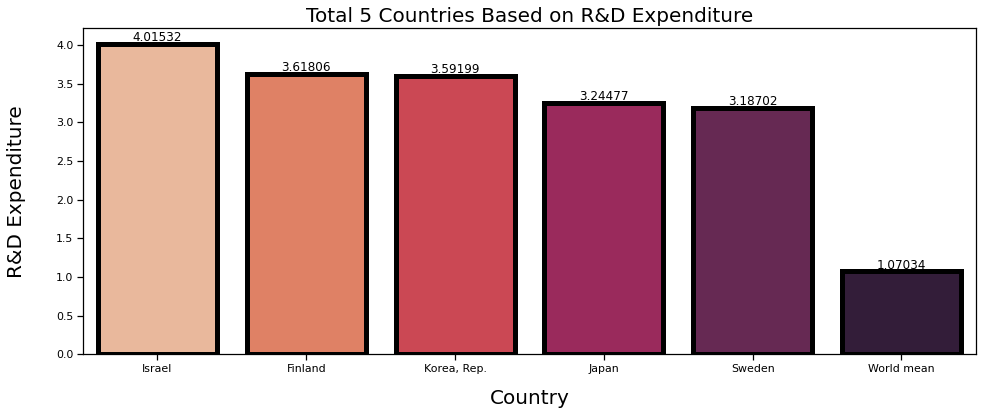

In [58]:
fig, ax = plt.subplots(figsize=(16,6))
top_countries = API_data.sort_values("RnD_exp",ascending=False).head(5)
mean = pd.DataFrame({'country':["World mean"], "RnD_exp":[API_data["RnD_exp"].mean()]})
exp = pd.concat([top_countries[["country","RnD_exp"]],mean],ignore_index=True)

sns.barplot(x="country",y="RnD_exp",data=exp, palette="rocket_r",  edgecolor='black', linewidth=5)
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=0)
plt.xlabel("Country", fontsize=20)
plt.ylabel("R&D Expenditure", fontsize=20)
plt.title("Total 5 Countries Based on R&D Expenditure", fontsize=20)

ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

The bar graph above shows the top 5 countries that spent the most on research and development as a percentage of their GDP in 2011. It is rather surprissing that the countries with most top ranked universities are not here. Rather those countries that focus more on improving the living standards of their people and spending more on providing them better and improved facilities. We know from world news that Israel is investing a lot in industries and flourishing as an economy. The other two countries in the list are Scandanavian countries that are known to be some of the best countries to live in and their expenditure on RnD could be a major reason for that. Japan too is far ahead when it comes to technological advancements. The last bar shows the average spending by countries in 2011 on RnD and it was approximately 1%. It would be interesting to see how this has changed over the years if at all.

###  What is the relationship between the top 20 universities total score and number of students?

<function matplotlib.pyplot.show(close=None, block=None)>

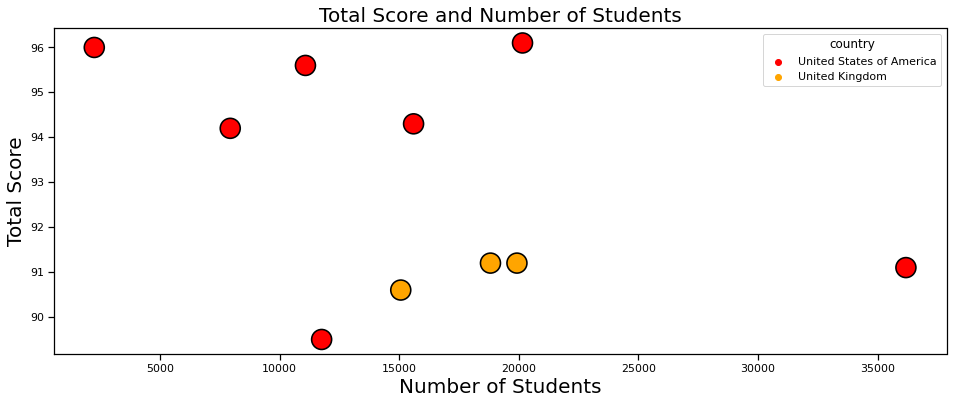

In [59]:
score_students = times.head(20)
fig, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x="num_students", y="total_score",hue="country", data=score_students, palette=["red","orange"], s=400, edgecolor="black")
plt.title("Total Score and Number of Students", fontsize=20)
plt.xlabel("Number of Students", fontsize=20)
plt.ylabel("Total Score", fontsize=20)
plt.show

To answer this question, we used a scatter plot. We wanted to see if universities with more students tend to be rated higher in rankings with a higher total score. From the 20 universities we saw that mostwere located in USA and then the UK. Those that were in US did not exceed a total of 20000 students except one which is above 35000. Nonetheless, they were rated at the top with an extremely high total score of above 94%. This means that it is not necessary for a university to admit many students to be rated better. Hence, quality of education is more important that quantity. The focus is on the few students that study there, providing them better facilities and quality educationr ather than admitting more every year.

### Which universities are most gender inclusive?

In [60]:
times.head()
times["female_male_ratio"].unique()

array([0, '33 : 67', '37 : 63', '42:58:00', '45:55:00', '46:54:00',
       '50:50:00'], dtype=object)

In [61]:
times[times["female_male_ratio"] == '50:50:00']

,world_rank,university_name,country,teaching_score,international_score,research_score,citations_score,income_score,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,international_students_percent,num_international_students
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,0.0,91.1,36186,16.4,15%,50:50:00,2011,15,5427.9
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,0.0,89.5,11751,4.4,20%,50:50:00,2011,20,2350.2


In [62]:
times[times["female_male_ratio"] == '46:54:00']

,world_rank,university_name,country,teaching_score,international_score,research_score,citations_score,income_score,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,international_students_percent,num_international_students
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,34%,46:54:00,2011,34,6396.08
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,34%,46:54:00,2011,34,6772.46


In [63]:
times[times["female_male_ratio"] == '45:55:00']

,world_rank,university_name,country,teaching_score,international_score,research_score,citations_score,income_score,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,international_students_percent,num_international_students
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,94.2,7929,8.4,27%,45:55:00,2011,27,2140.83


"University of California, Berkeley", "Yale University","University of Cambridge", "University of Oxford" and "Princeton University" are the top universities that are most gender inclusive.

### How is education expenditure divided among different types of institutions?

Text(0.5, 1.0, 'Education Expenditure by Type of Institution')

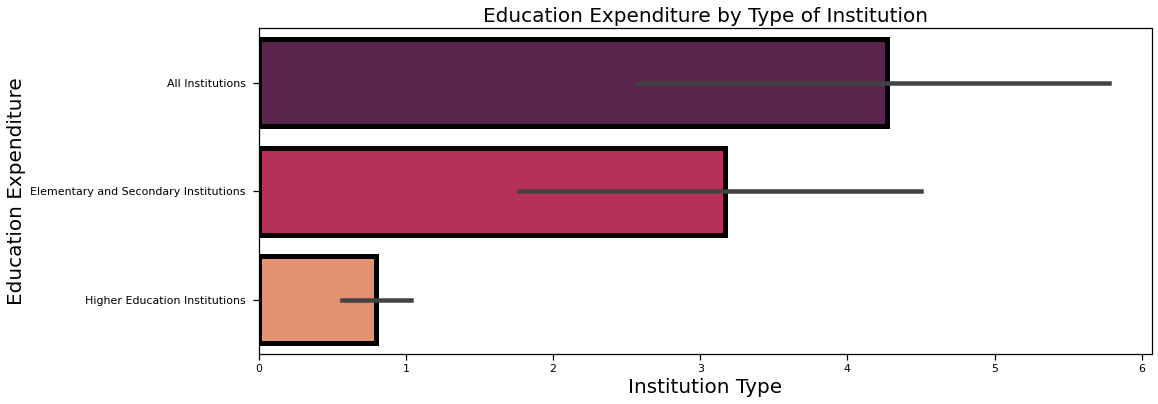

In [64]:
plt.figure(figsize=(16,6))
sns.barplot(y="institute_type",x="2011", data=final_df, edgecolor="black", palette="rocket",  linewidth=5)
plt.xlabel("Institution Type", fontsize=20)
plt.ylabel("Education Expenditure", fontsize=20)
plt.title("Education Expenditure by Type of Institution", fontsize=20)

All Institutions took the most part of the education expenditure in 2011 with a value approximately equal to 4.2, then we find the Elementary and Secondary Institutions with a value of 3.1. The Higher Education Institutions took the smallest part with a value of 0.8. Universities are part of higher education institutions. By this graph we know that in 2011 the education expenditure on universities was less compared to that on higher and secondary institutions.

### What is the distribution of education expenditure between private and public institutes?

In [65]:
# data preprocessing
high_expenditure = expenditure_updated.sort_values("2011",ascending=False).head(30)
high_expenditure
new = high_expenditure[(high_expenditure["direct_expenditure_type"] == "Total") | (high_expenditure['direct_expenditure_type'] == 'Public')]
new

,country,year,RnD_exp,institute_type,direct_expenditure_type,2011
60,Denmark,2011,2.94465,All Institutions,Total,7.9
123,Iceland,2011,2.41367,All Institutions,Total,7.7
54,Denmark,2011,2.94465,All Institutions,Public,7.5
195,New Zealand,2011,1.23065,All Institutions,Total,7.5
141,Israel,2011,4.01532,All Institutions,Total,7.3
198,Norway,2011,1.62712,All Institutions,Public,7.3
117,Iceland,2011,2.41367,All Institutions,Public,6.9
294,United States,2011,2.76525,All Institutions,Total,6.9
24,Belgium,2011,2.17332,All Institutions,Total,6.6
78,Finland,2011,3.61806,All Institutions,Total,6.5


Text(0.5, 1.0, 'Education Expenditure by Expenditure Type in Countries ')

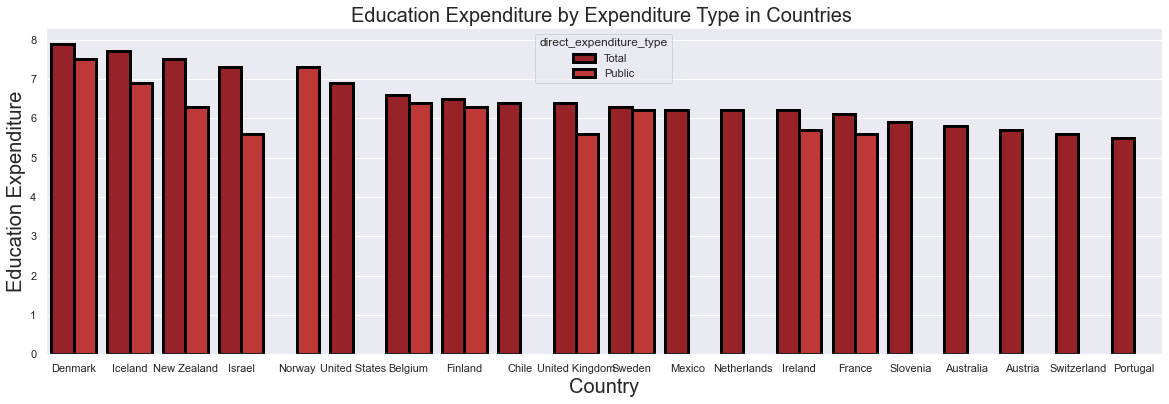

In [66]:
sns.set(rc={'figure.figsize':(20,6)})
fig, ax = plt.subplots()
sns.barplot(x='country', y='2011', hue='direct_expenditure_type', data=new, alpha=1, palette=sns.color_palette("Reds_r"), edgecolor="black", linewidth=3)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel("Country", fontsize=20)
ax.set_ylabel("Education Expenditure", fontsize=20)
plt.title("Education Expenditure by Expenditure Type in Countries ", fontsize=20)

The above bar chart shows us different countries distribution of education expenditure by the expenditure type. We can see how crucial complete and accurate data is to provide any arguments and give statements. Incomplete data doesnt allow analysts to make solid arguments. In the above figure we have public and total expenditure as private expenditure was not available for most countries. For example in 2011 we can see Denmark spent the most on education with a total of approximately 8% out of which approximately 7% was spent on public insititutes. It is known that Denmark's education standards are quite high especially state spending on education. However, we can also see that we only have data for total spending for Austria, Portugal, Chile and more. Hence a comparative analysis between countries is challenging with incomplete data.

### How did different features contribute to the top 10 university's ranking?

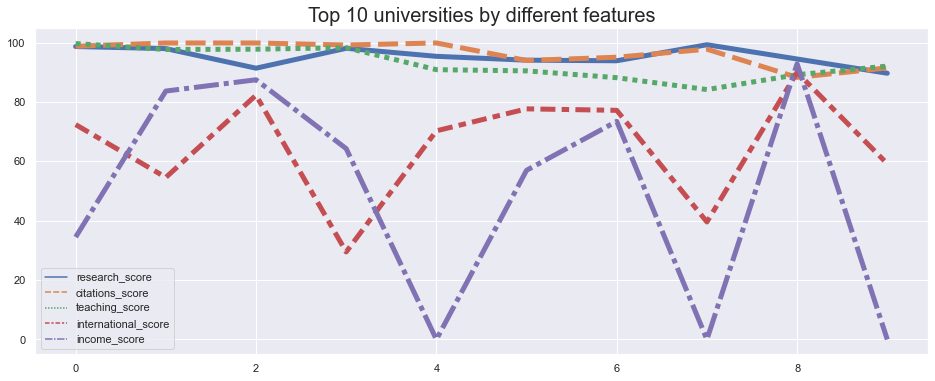

In [67]:
top_10 = times.head(10)
top_10_f  = top_10.loc[:,["research_score","citations_score","teaching_score","international_score","income_score"]]
plt.figure(figsize=(16,6))
sns.lineplot(data=top_10_f,linewidth=5 )
plt.title("Top 10 universities by different features", fontsize=20)
plt.show()

In the above line graph we can see 5 important variables that Times uses to rank universities world wide. We can see the ranking of top 10 universities by these criterias. These universities had the highest citation score. However the university on the 8th rank had lowest citation score compared to the rest. The income score seems to fluctatuate a lot with a steep incline and decline at different rankings. This could be due to the economic environment in that country. This graph is useful to compare different categories that have similar weightage and how each is spread. 

## Conclusion

This project required us to perform a complete analysis on a given dataset using python knowledge acquired during the course. The analysis was based on two tables, merged together; times ranking and education expenditure and further enriched by using the World Bank API to access Research and Development Expenditure by countries. We narrowed our analysis to 2011. The preprocessed data was rather challenging to start with and required quite a bit of cleaning and understanding exaclty what the data is about. After cleaning the columns, changing data types and checking the structure we went ahead with visualizing the data. This was important to see what exactly will the data help us to answer. We framed our questions accordingly to make sure we are using the available data to its full potential answering many relevant questions. Then we used a package to get data from world bank and created a new dataset. Finally, we were ready to answer questions that could be useful for several people in the business world, government organizations, university ranking personell or others looking for valuable information. Overall, with the help of our professor and her TA we were able to complete our task and thouroughly enjoyed it.